## Reading the Data

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import missingno as msno
import random

In [ ]:
# Mengambil data dari google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Membaca file user
user = pd.read_csv('/content/drive/MyDrive/Tim 28D Final Project Drive/updated_user.csv')

In [ ]:
user.head()

,id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth
0,SC6107042006001,SITI DAMAR DAMAYANTI,perempuan,2070000,120000,720000,22-10-23,27-12-99
1,SC6107042006002,dr. BASRI FILIUS M.Si.,laki-laki,1950000,220000,840000,03-12-23,01-03-90
2,SC6107042006003,HARI,laki-laki,1890000,210000,260000,19-10-23,13-04-97
3,SC6107042006004,GILANG,laki-laki,1640000,50000,380000,04-12-23,25-11-91
4,SC6107042006005,"TEDDY S.E., M.M.",laki-laki,1810000,280000,440000,29-12-23,16-08-01


In [ ]:
# Melihat berapa banyak data
user.shape

(90577, 8)

In [ ]:
# Mengubah tipe data fitur-fitur yang diperlukan
user['join_date'] = pd.to_datetime(user['join_date'])
user['birth'] = pd.to_datetime(user['birth'])

<ipython-input-6-e4c3a04c1c0c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user['join_date'] = pd.to_datetime(user['join_date'])
<ipython-input-6-e4c3a04c1c0c>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user['birth'] = pd.to_datetime(user['birth'])


In [ ]:
# Membaca tabel transaksi tiap provinsi
tr = pd.read_csv('/content/drive/MyDrive/Tim 28D Final Project Drive/updated_trx_merged.csv')

In [ ]:
# Hitung total gross amount dan discounts untuk setiap pengguna
tr_new = tr.groupby('user_id')[['gross_amount', 'discounts']].sum().reset_index()

In [ ]:
tr_new.head()

,user_id,gross_amount,discounts
0,SC3301012001002,1960000.0,389300.0
1,SC3301012001003,2020000.0,416600.0
2,SC3301012001004,2040000.0,366400.0
3,SC3301012001005,1870000.0,412600.0
4,SC3301012001006,1980000.0,258900.0


In [ ]:
# Melihat berapa banyak data
tr_new.shape

(83244, 3)

## Menggabungkan Data

In [ ]:
# Menggabungkan tabel user dan tabel transaksi
user_new = pd.merge(user, tr_new, left_on='id', right_on='user_id', how='inner')

In [ ]:
user_new.shape

(83244, 11)

In [ ]:
user_new.isnull().sum()

id                0
full_name         0
gender            0
money_spent       0
refund            0
wallet_balance    0
join_date         0
birth             0
user_id           0
gross_amount      0
discounts         0
dtype: int64

In [ ]:
# Tabel yang memiliki money spent dan gross amount 0 dan NaN (untuk dihapus/didrop)
user_noms_noga = user_new[(user_new['money_spent'] == 0) & (user_new['gross_amount'] == 0)]

In [ ]:
# Menghapus data yang tidak memiliki money spent dan gross amount
user_new = user_new.drop(user_noms_noga.index)

## Penghandle-an Data yang Lahir Lebih Dari 2006


### SC93

In [ ]:
user_SC93 = user_new[user_new['id'].str.contains('SC93')]

In [ ]:
user_SC93.shape

(109, 11)

In [ ]:
# Check for negative values in 'money_spent'
minus_ms = user_SC93[user_SC93['money_spent'] < 0]

# Check for negative values in 'refund'
minus_refund = user_SC93[user_SC93['refund'] < 0]

# Check for negative values in 'wallet_balance'
minus_wb = user_SC93[user_SC93['wallet_balance'] < 0]

# Print the number of rows with negative values
print(f"Number of rows with negative money_spent: {len(minus_ms)}")
print(f"Number of rows with negative refund: {len(minus_refund)}")
print(f"Number of rows with negative wallet_balance: {len(minus_wb)}")

Number of rows with negative money_spent: 0
Number of rows with negative refund: 0
Number of rows with negative wallet_balance: 1


In [ ]:
# Drop rows with negative wallet balance
user_SC93 = user_SC93.drop(user_SC93[user_SC93['wallet_balance'] < 0].index)

In [ ]:
user93_over_birth = user_SC93[user_SC93['birth'] > '2006-12-31']

In [ ]:
user93_over_birth.shape

(20, 11)

In [ ]:
# Membuat kolom baru 'year' yang berisi tahun dari kolom 'birth'
user_SC93['year'] = user_SC93['birth'].dt.year # Kolom year jika tidak diperlukan nantinya dapat dihapus

# Menghitung value counts untuk setiap tahun
value_counts_per_year = user_SC93['year'].value_counts().sort_index()

print(value_counts_per_year)

year
1974    1
1975    3
1976    1
1977    1
1978    3
1979    3
1980    1
1981    3
1982    5
1983    1
1984    1
1985    1
1986    7
1987    1
1988    4
1989    3
1990    5
1991    4
1992    4
1993    5
1994    3
1995    5
1996    3
1997    2
1998    4
1999    3
2000    1
2001    2
2002    2
2003    2
2004    3
2005    1
2007    8
2061    1
2064    1
2065    1
2067    1
2070    3
2072    3
2073    2
Name: count, dtype: int64


In [ ]:
# Membagi 2 bagian pada pada yang lahir lebih dari tahun 2006
# Setengahnya diisi dengan nilai mean dan setengah lagi diisi dengan nilai median
# Menghitung mean dan median dari DataFrame copy_user93
mean_value = user_SC93['birth'].mean()
median_value = user_SC93['birth'].median()

# Membagi user93_over_birth menjadi dua bagian
half_len = len(user93_over_birth) // 2
first_half = user93_over_birth.iloc[:half_len]
second_half = user93_over_birth.iloc[half_len:]

# Mengisi setengah pertama dengan mean dan setengah kedua dengan median
first_half['birth'] = mean_value
second_half['birth'] = median_value

# Menggabungkan kembali kedua bagian
user93_over_birth_filled = pd.concat([first_half, second_half])

# Hasilnya adalah DataFrame user93_over_birth yang telah diisi setengahnya dengan mean dan setengahnya dengan median
print(user93_over_birth_filled)

                    id                 full_name     gender  money_spent  \
14024  SC9302032006001     PRIADNO S.I.P., M.Sc.  laki-laki       390000   
14031  SC9303052006001             HIDAYAT BAGUS  laki-laki      2230000   
14036  SC9301011009003        Dra. Lenny Herdian  perempuan      1620000   
14037  SC9301011009011                     ELITA  perempuan      1520000   
14043  SC9301011011017   ML. ODITRI LENNY INSANI  perempuan      2140000   
14049  SC9301011004028                      LINA  perempuan      1590000   
14052  SC9301011005002          SRI S.Pi., M.Si.  perempuan       980000   
14065  SC9301011002028      AULIA NUR S.H., M.H.  perempuan      2480000   
14066  SC9301011010007           SOMI S.H., M.H.  perempuan      1450000   
14067  SC9301011010022  MEISASTRI CHAIRINI M.Si.  perempuan      1550000   
14070  SC9301122001001                 ROSALINDA  perempuan      2090000   
14075  SC9301052008009         PAMEITA APRILIANA  perempuan      1440000   
14083  SC930

<ipython-input-23-b8a3962c4936>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half['birth'] = mean_value
<ipython-input-23-b8a3962c4936>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_half['birth'] = median_value


In [ ]:
user93_over_birth_filled['birth'] = user93_over_birth_filled['birth'].dt.date
user93_over_birth_filled.head()

,id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,user_id,gross_amount,discounts
14024,SC9302032006001,"PRIADNO S.I.P., M.Sc.",laki-laki,390000,30000,150000,2023-10-18,2000-07-27,SC9302032006001,380000.0,157000.0
14031,SC9303052006001,HIDAYAT BAGUS,laki-laki,2230000,30000,110000,2023-12-29,2000-07-27,SC9303052006001,2220000.0,10000.0
14036,SC9301011009003,Dra. Lenny Herdian,perempuan,1620000,120000,810000,2023-07-11,2000-07-27,SC9301011009003,2470100.0,202600.0
14037,SC9301011009011,ELITA,perempuan,1520000,80000,720000,2023-10-12,2000-07-27,SC9301011009011,1520000.0,249600.0
14043,SC9301011011017,ML. ODITRI LENNY INSANI,perempuan,2140000,20000,730000,2023-12-17,2000-07-27,SC9301011011017,2120000.0,262800.0


In [ ]:
user93_over_birth_filled.dtypes

id                        object
full_name                 object
gender                    object
money_spent                int64
refund                     int64
wallet_balance             int64
join_date         datetime64[ns]
birth                     object
user_id                   object
gross_amount             float64
discounts                float64
dtype: object

In [ ]:
user93_over_birth_filled['birth'] = pd.to_datetime(user93_over_birth_filled['birth'])

In [ ]:
# Memasukkan nilai yang sudah di-handle ke dalam tabel copy_user93
# Mengambil indeks data yang sama di kedua DataFrames
indexes = user93_over_birth_filled.index.intersection(user_SC93.index)

# Mengganti nilai pada copy_user93 dengan nilai yang sudah diperbaiki dari user93_over_birth_filled
user_SC93.loc[indexes, 'birth'] = user93_over_birth_filled.loc[indexes, 'birth']

In [ ]:
user_SC93 = user_SC93.drop('year', axis=1)

### SC33

In [ ]:
user_SC33 = user_new[user_new['id'].str.contains('SC33')]

In [ ]:
# Check for negative values in 'money_spent'
minus_ms = user_SC33[user_SC33['money_spent'] < 0]

# Check for negative values in 'refund'
minus_refund = user_SC33[user_SC33['refund'] < 0]

# Check for negative values in 'wallet_balance'
minus_wb = user_SC33[user_SC33['wallet_balance'] < 0]

# Check for min values in refund and wallet balance
minus_randwb = user_SC33.loc[(user_SC33['refund'] < 0) & (user_SC33['wallet_balance'] < 0)]

# Print the number of rows with negative values
print(f"Number of rows with negative money_spent: {len(minus_ms)}")
print(f"Number of rows with negative refund: {len(minus_refund)}")
print(f"Number of rows with negative wallet_balance: {len(minus_wb)}")
print(f"Number of rows with min refund and wallet balance: {len(minus_randwb)}")

Number of rows with negative money_spent: 0
Number of rows with negative refund: 103
Number of rows with negative wallet_balance: 336
Number of rows with min refund and wallet balance: 13


In [ ]:
# Drop rows with negative refund
user_SC33 = user_SC33.drop(user_SC33[user_SC33['refund'] < 0].index)

# Drop rows with negative wallet balance
user_SC33 = user_SC33.drop(user_SC33[user_SC33['wallet_balance'] < 0].index)

In [ ]:
user33_over_birth = user_SC33[user_SC33['birth'] > '2006-12-31']

In [ ]:
# Membuat kolom baru 'year' yang berisi tahun dari kolom 'birth'
user_SC33['year'] = user_SC33['birth'].dt.year # Kolom year jika tidak diperlukan nantinya dapat dihapus

# Menghitung value counts untuk setiap tahun
value_counts_per_year = user_SC33['year'].value_counts().sort_index()

print(value_counts_per_year)

year
1974     947
1975    1138
1976    1242
1977    1398
1978    1437
1979    1597
1980    1751
1981    1818
1982    2009
1983    2104
1984    2193
1985    2311
1986    2296
1987    2472
1988    2452
1989    2480
1990    2454
1991    2428
1992    2437
1993    2311
1994    2183
1995    2154
1996    2054
1997    1908
1998    1868
1999    1641
2000    1563
2001    1362
2002    1228
2003    1118
2004     966
2005     935
2006     731
2007    4022
2059     258
2060      73
2061      98
2062     132
2063     168
2064     200
2065     251
2066     289
2067     366
2068     412
2069     488
2070     589
2071     649
2072     802
2073     900
Name: count, dtype: int64


In [ ]:
# Membagi data pada provinsi SC33 yang lahir lebih dari 2006 menjadi 5 bagian
first_part = user33_over_birth.iloc[:2101]
second_part = user33_over_birth.iloc[2101:4202]
third_part = user33_over_birth.iloc[4202:6303]
fourth_part = user33_over_birth.iloc[6303:8404]
fifth_part = user33_over_birth.iloc[8404:]

first_part['birth'] = '2001-03-03'
second_part['birth'] = '2002-04-04'
third_part['birth'] = '2003-05-05'
fourth_part['birth'] = '2004-06-06'
fifth_part['birth'] = '2005-07-07'

user33_over_birth_filled = pd.concat([first_part, second_part, third_part, fourth_part, fifth_part])

# Hasilnya adalah DataFrame user93_over_birth yang telah diisi setengahnya dengan mean dan setengahnya dengan median
print(user33_over_birth_filled)

                    id                   full_name     gender  money_spent  \
14133  SC3304092002006  MARYATI ADELAIDA A.Md.A.K.  perempuan      2020000   
14149  SC3304092015006           SUPAWESTRI HINDUN  perempuan      1890000   
14152  SC3304092009001                 ENDAH ANWAR  perempuan      2330000   
14153  SC3304092009002            Ricad S.H., M.H.  laki-laki      2060000   
14190  SC3304092017003         LUCIA SYANWANI S.E.  perempuan      1970000   
...                ...                         ...        ...          ...   
83201  SC3307091011008              MUDIYANA ULFAH  perempuan      1740000   
83202  SC3307091011009                P S.H., M.H.  perempuan      1550000   
83207  SC3307092018004              MARYATI HINDUN  perempuan      2020000   
83218  SC3307092016007                    ASSO SRI  perempuan      1730000   
83220  SC3307091020001                        MERI  perempuan      1630000   

       refund  wallet_balance  join_date       birth          u

<ipython-input-34-ade77daec06f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_part['birth'] = '2001-03-03'
<ipython-input-34-ade77daec06f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_part['birth'] = '2002-04-04'
<ipython-input-34-ade77daec06f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [ ]:
user33_over_birth_filled['birth'] = pd.to_datetime(user33_over_birth_filled['birth'])
# Mengambil indeks data yang sama di kedua DataFrames
indexes = user33_over_birth_filled.index.intersection(user_SC33.index)

# Mengganti nilai pada copy_user93 dengan nilai yang sudah diperbaiki dari user93_over_birth_filled
user_SC33.loc[indexes, 'birth'] = user33_over_birth_filled.loc[indexes, 'birth']

In [ ]:
user_SC33 = user_SC33.drop('year', axis=1)

In [ ]:
user_SC33.shape

(68683, 11)

### SC61

In [ ]:
user_SC61 = user_new[user_new['id'].str.contains('SC61')]

In [ ]:
# Check for negative values in 'money_spent'
minus_ms = user_SC61[user_SC61['money_spent'] < 0]

# Check for negative values in 'refund'
minus_refund = user_SC61[user_SC61['refund'] < 0]

# Check for negative values in 'wallet_balance'
minus_wb = user_SC61[user_SC61['wallet_balance'] < 0]

# Print the number of rows with negative values
print(f"Number of rows with negative money_spent: {len(minus_ms)}")
print(f"Number of rows with negative refund: {len(minus_refund)}")
print(f"Number of rows with negative wallet_balance: {len(minus_wb)}")

Number of rows with negative money_spent: 0
Number of rows with negative refund: 21
Number of rows with negative wallet_balance: 299


In [ ]:
# Drop rows with negative refund
user_SC61 = user_SC61.drop(user_SC61[user_SC61['refund'] < 0].index)

# Drop rows with negative wallet balance
user_SC61 = user_SC61.drop(user_SC61[user_SC61['wallet_balance'] < 0].index)

In [ ]:
user61_over_birth = user_SC61[user_SC61['birth'] > '2006-12-31']

In [ ]:
# Membuat kolom baru 'year' yang berisi tahun dari kolom 'birth'
user_SC61['year'] = user_SC61['birth'].dt.year # Kolom year jika tidak diperlukan nantinya dapat dihapus

# Menghitung value counts untuk setiap tahun
value_counts_per_year = user_SC61['year'].value_counts().sort_index()

print(value_counts_per_year)

year
1974    127
1975    151
1976    172
1977    208
1978    229
1979    233
1980    244
1981    228
1982    277
1983    319
1984    310
1985    346
1986    336
1987    323
1988    349
1989    313
1990    361
1991    328
1992    332
1993    338
1994    322
1995    296
1996    281
1997    279
1998    242
1999    223
2000    204
2001    169
2002    164
2003    158
2004    137
2005    134
2006     98
2007    592
2059     35
2060     11
2061     18
2062     22
2063     20
2064     31
2065     31
2066     43
2067     52
2068     54
2069     69
2070     87
2071     86
2072    123
2073    126
Name: count, dtype: int64


In [ ]:
# Membagi data menjadi 5 bagian
first_part_61 = user61_over_birth.iloc[:310]
second_part_61 = user61_over_birth.iloc[310:620]
third_part_61 = user61_over_birth.iloc[620:930]
fourth_part_61 = user61_over_birth.iloc[930:1240]
fifth_part_61 = user61_over_birth.iloc[1240:]

first_part_61['birth'] = '2002-03-03'
second_part_61['birth'] = '2003-04-04'
third_part_61['birth'] = '2004-05-05'
fourth_part_61['birth'] = '2005-06-06'
fifth_part_61['birth'] = '2006-07-07'

user61_over_birth_filled = pd.concat([first_part_61, second_part_61, third_part_61, fourth_part_61, fifth_part_61])

<ipython-input-43-0e6be245800e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_part_61['birth'] = '2002-03-03'
<ipython-input-43-0e6be245800e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_part_61['birth'] = '2003-04-04'
<ipython-input-43-0e6be245800e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
# Mengubah tipe data menjadi datetime
user61_over_birth_filled['birth'] = pd.to_datetime(user61_over_birth_filled['birth'])
# Mengambil indeks data yang sama di kedua DataFrames
indexes = user61_over_birth_filled.index.intersection(user_SC61.index)

# Mengganti nilai pada copy_user93 dengan nilai yang sudah diperbaiki dari user93_over_birth_filled
user_SC61.loc[indexes, 'birth'] = user61_over_birth_filled.loc[indexes, 'birth']

In [ ]:
user_SC61 = user_SC61.drop('year', axis=1)

In [ ]:
user_SC61.shape

(9631, 11)

### SC62

In [ ]:
user_SC62 = user_new[user_new['id'].str.contains('SC62')]

In [ ]:
# Check for negative values in 'money_spent'
minus_ms = user_SC62[user_SC62['money_spent'] < 0]

# Check for negative values in 'refund'
minus_refund = user_SC62[user_SC62['refund'] < 0]

# Check for negative values in 'wallet_balance'
minus_wb = user_SC62[user_SC62['wallet_balance'] < 0]

# Print the number of rows with negative values
print(f"Number of rows with negative money_spent: {len(minus_ms)}")
print(f"Number of rows with negative refund: {len(minus_refund)}")
print(f"Number of rows with negative wallet_balance: {len(minus_wb)}")

Number of rows with negative money_spent: 0
Number of rows with negative refund: 6
Number of rows with negative wallet_balance: 53


In [ ]:
# Drop rows with negative refund
user_SC62 = user_SC62.drop(user_SC62[user_SC62['refund'] < 0].index)

# Drop rows with negative wallet balance
user_SC62 = user_SC62.drop(user_SC62[user_SC62['wallet_balance'] < 0].index)

In [ ]:
user62_over_birth = user_SC62[user_SC62['birth'] > '2006-12-31']

In [ ]:
# Membuat kolom baru 'year' yang berisi tahun dari kolom 'birth'
user_SC62['year'] = user_SC62['birth'].dt.year # Kolom year jika tidak diperlukan nantinya dapat dihapus

# Menghitung value counts untuk setiap tahun
value_counts_per_year = user_SC62['year'].value_counts().sort_index()

print(value_counts_per_year)

year
1974     58
1975     60
1976     90
1977     83
1978     79
1979    100
1980    112
1981    132
1982    119
1983    124
1984    142
1985    137
1986    125
1987    140
1988    155
1989    118
1990    145
1991    137
1992    133
1993    138
1994    135
1995    110
1996    107
1997    101
1998    110
1999     95
2000     99
2001     80
2002     71
2003     79
2004     59
2005     53
2006     41
2007    230
2059     17
2060      8
2061     10
2062      7
2063      9
2064     14
2065     25
2066      9
2067     27
2068     23
2069     22
2070     22
2071     34
2072     48
2073     43
Name: count, dtype: int64


In [ ]:
first_part_62 = user62_over_birth.iloc[:100]
second_part_62 = user62_over_birth.iloc[100:200]
third_part_62 = user62_over_birth.iloc[200:300]
fourth_part_62 = user62_over_birth.iloc[300:400]
fifth_part_62 = user62_over_birth.iloc[400:500]
sixth_part_62 = user62_over_birth.iloc[500:]

first_part_62['birth'] = '2001-01-01'
second_part_62['birth'] = '2002-02-02'
third_part_62['birth'] = '2003-03-03'
fourth_part_62['birth'] = '2004-04-04'
fifth_part_62['birth'] = '2005-05-05'
sixth_part_62['birth'] = '2006-06-06'

user62_over_birth_filled = pd.concat([first_part_62, second_part_62, third_part_62, fourth_part_62, fifth_part_62, sixth_part_62])

<ipython-input-52-a57d48c1142a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_part_62['birth'] = '2001-01-01'
<ipython-input-52-a57d48c1142a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_part_62['birth'] = '2002-02-02'
<ipython-input-52-a57d48c1142a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
# Mengubah tipe data menjadi datetime
user62_over_birth_filled['birth'] = pd.to_datetime(user62_over_birth_filled['birth'])
# Mengambil indeks data yang sama di kedua DataFrames
indexes = user62_over_birth_filled.index.intersection(user_SC62.index)

# Mengganti nilai pada copy_user93 dengan nilai yang sudah diperbaiki dari user93_over_birth_filled
user_SC62.loc[indexes, 'birth'] = user62_over_birth_filled.loc[indexes, 'birth']

In [ ]:
user_SC62 = user_SC62.drop('year', axis=1)

In [ ]:
user_SC62.shape

(4015, 11)

## Data Digabungkan Kembali

In [ ]:
# concatenate the DataFrames
user_latest = pd.concat([user_SC33, user_SC61, user_SC62, user_SC93], ignore_index=True)

In [ ]:
user_latest.shape

(82437, 11)

## Feature Engineering

In [ ]:
# Buat kolom 'age'
user_latest['age'] = (pd.to_datetime('today') - user_latest['birth']).dt.days // 365

In [ ]:
# Buat kolom 'total_spent'
user_latest['total_spent'] = user_latest['money_spent'] - user_latest['refund']

In [ ]:
# Buat kolom 'saldo'
user_latest['balance'] = user_latest['wallet_balance'] + user_latest['refund']

In [ ]:
# Buat kolom 'harga_total'
user_latest['total_price'] = user_latest['gross_amount'] - user_latest['refund'] - user_latest['discounts']

In [ ]:
user_latest = pd.get_dummies(user_latest, columns=['gender'], dtype=int)

In [ ]:
user_latest = user_latest.rename(columns={'gender_laki-laki': 'male', 'gender_perempuan': 'female'})

In [ ]:
user_latest["rfm_recency"] = (pd.to_datetime('today') - user_latest["join_date"]).dt.days
user_latest["rfm_frequency"] = user_latest.groupby("id")["total_spent"].transform("count")
user_latest["rfm_monetary_value"] = user_latest["total_spent"].sum()
user_latest["tenure"] = (pd.to_datetime('today') - user_latest["join_date"]).dt.days
user_latest["refund_ratio"] = user_latest["refund"] / user_latest["total_spent"]

In [ ]:
user_latest.describe()

,money_spent,refund,wallet_balance,join_date,birth,gross_amount,discounts,age,total_spent,balance,total_price,male,female,rfm_recency,rfm_frequency,rfm_monetary_value,tenure,refund_ratio
count,8.243700e+04,8.243700e+04,8.243700e+04,82437,82437,8.243700e+04,8.243700e+04,82437.000000,8.243700e+04,8.243700e+04,8.243700e+04,82437.000000,82437.000000,82437.000000,82437.0,8.243700e+04,82437.000000,8.209700e+04
mean,1.773527e+06,5.144575e+05,6.100552e+05,2023-09-27 00:45:01.932384768,1991-11-19 09:06:27.918046464,1.749220e+06,2.973758e+05,32.108568,1.259070e+06,1.124513e+06,9.373866e+05,0.256996,0.743004,253.968728,1.0,1.037940e+11,253.968728,inf
min,0.000000e+00,0.000000e+00,0.000000e+00,2023-01-10 00:00:00,1974-01-01 00:00:00,0.000000e+00,0.000000e+00,17.000000,-2.726891e+10,0.000000e+00,-2.726937e+10,0.000000,0.000000,-204.000000,1.0,1.037940e+11,-204.000000,-1.090000e+02
25%,1.550000e+06,1.000000e+05,4.300000e+05,2023-08-12 00:00:00,1984-10-05 00:00:00,1.520000e+06,2.024000e+05,24.000000,1.350000e+06,5.600000e+05,1.021400e+06,0.000000,0.000000,180.000000,1.0,1.037940e+11,180.000000,6.106870e-02
50%,1.810000e+06,1.700000e+05,5.800000e+05,2023-10-29 00:00:00,1991-11-25 00:00:00,1.770000e+06,2.829000e+05,32.000000,1.610000e+06,7.700000e+05,1.267200e+06,0.000000,1.000000,222.000000,1.0,1.037940e+11,222.000000,1.049383e-01
75%,2.030000e+06,2.400000e+05,7.600000e+05,2023-12-10 00:00:00,2000-04-02 00:00:00,2.000000e+06,3.761000e+05,39.000000,1.850000e+06,9.900000e+05,1.510000e+06,1.000000,1.000000,300.000000,1.0,1.037940e+11,300.000000,1.619718e-01
max,2.990000e+06,2.727112e+10,1.115000e+07,2024-12-28 00:00:00,2006-12-28 00:00:00,3.222000e+07,2.863700e+06,50.000000,2.970000e+06,2.727187e+10,3.129000e+07,1.000000,1.000000,514.000000,1.0,1.037940e+11,514.000000,inf
std,3.760011e+05,9.498158e+07,3.053967e+05,NaN,NaN,3.943969e+05,1.400445e+05,8.875695,9.498080e+07,9.498270e+07,9.498129e+07,0.436980,0.436980,101.458312,0.0,0.000000e+00,101.458312,NaN


In [ ]:
user_latest = user_latest.drop(user_latest[user_latest['total_spent'] < 0].index)
user_latest = user_latest.drop(user_latest[user_latest['tenure'] < 0].index)
user_latest = user_latest.drop(user_latest[user_latest['total_price'] < 0].index)
user_latest = user_latest.drop('user_id', axis=1)

In [ ]:
user_latest = user_latest.drop(['join_date', 'birth'], axis=1)

In [ ]:
user_latest.dropna(inplace=True)

In [ ]:
user_latest.shape

(81871, 18)

## Iniliasasi

In [ ]:
# Install libraries (jika belum terinstall)
!pip install pycaret
from pycaret.clustering import *

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
# Normalize data dengan MinMax
MinMax = MinMaxScaler()

In [ ]:
cf = user_latest[['money_spent', 'balance', 'total_spent', 'gross_amount', 'rfm_recency', 'discounts', 'refund', 'refund_ratio']]
cf.replace([np.inf, -np.inf], np.nan, inplace=True)
cf_MinMax = MinMax.fit_transform(cf)

In [ ]:
cf_MinMax

array([[0.56375839, 0.08994709, 0.46464646, ..., 0.14631421, 0.23664122,
        0.01727982],
       [0.72483221, 0.10846561, 0.58585859, ..., 0.15445054, 0.32824427,
        0.01900973],
       [0.54697987, 0.06349206, 0.48148148, ..., 0.07217935, 0.16030534,
        0.0112964 ],
       ...,
       [0.5       , 0.08201058, 0.3973064 , ..., 0.12543213, 0.24427481,
        0.0208605 ],
       [0.61744966, 0.03791887, 0.61616162, ..., 0.08789328, 0.01526718,
        0.00084069],
       [0.44630872, 0.05908289, 0.44444444, ..., 0.05674477, 0.01526718,
        0.0011655 ]])

In [ ]:
# Membuat dataframe dari hasil normalize untuk dilakukan invert terhadap
# beberapa kolom ['refund', 'discounts', 'rfm_recency']
cf_df = pd.DataFrame(cf_MinMax, columns=['money_spent', 'balance', 'total_spent',
                                         'gross_amount', 'rfm_recency', 'discounts',
                                         'refund', 'refund_ratio'])

In [ ]:
cf_df.head()

,money_spent,balance,total_spent,gross_amount,rfm_recency,discounts,refund,refund_ratio
0,0.563758,0.089947,0.464646,0.051847,0.098592,0.146314,0.236641,0.017280
1,0.724832,0.108466,0.585859,0.064266,0.484507,0.154451,0.328244,0.019010
2,0.546980,0.063492,0.481481,0.050605,0.028169,0.072179,0.160305,0.011296
3,0.674497,0.097884,0.569024,0.061472,0.183099,0.171526,0.251908,0.015020
4,0.697987,0.103175,0.572391,0.063024,0.053521,0.154555,0.297710,0.017647


In [ ]:
# Invert fitur yang tidak linear
cf_df['refund'] = 1 - cf_df['refund']
cf_df['rfm_recency'] = 1 - cf_df['rfm_recency']
cf_df['discounts'] = 1 - cf_df['discounts']

In [ ]:
cf_df.head()

,money_spent,balance,total_spent,gross_amount,rfm_recency,discounts,refund,refund_ratio
0,0.563758,0.089947,0.464646,0.051847,0.901408,0.853686,0.763359,0.017280
1,0.724832,0.108466,0.585859,0.064266,0.515493,0.845549,0.671756,0.019010
2,0.546980,0.063492,0.481481,0.050605,0.971831,0.927821,0.839695,0.011296
3,0.674497,0.097884,0.569024,0.061472,0.816901,0.828474,0.748092,0.015020
4,0.697987,0.103175,0.572391,0.063024,0.946479,0.845445,0.702290,0.017647


In [ ]:
cf_df.shape

(81871, 8)

In [ ]:
clustering_setup = setup(data=cf_df,
                         session_id=123)

,Description,Value
0,Session id,123
1,Original data shape,"(81871, 8)"
2,Transformed data shape,"(81871, 8)"
3,Numeric features,8
4,Rows with missing values,0.0%
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


## K-Means

In [ ]:
kmeans_model = create_model('kmeans', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2721,62954.2993,1.2126,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

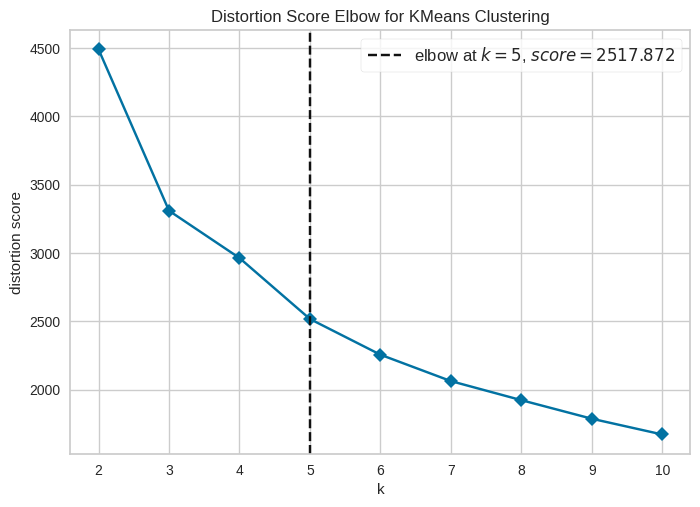

In [ ]:
plot_model(kmeans_model, 'elbow')

In [ ]:
plot_model(kmeans_model, 'cluster')

## DBSCAN

In [ ]:
dbscan_model = create_model('dbscan', num_clusters=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:37:15
Status,. . . . . . . . . . . . . . . . . .,Fitting 4 Clusters
Estimator,. . . . . . . . . . . . . . . . . .,Density-Based Spatial Clustering


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
plot_model(dbscan_model, 'elbow')

In [ ]:
plot_model(dbscan_model, 'cluster')

## Assign Model

In [ ]:
kmeans_df = assign_model(kmeans_model)

In [ ]:
user_latest['Cluster'] = kmeans_df['Cluster']

In [ ]:
user_latest.head()

,id,full_name,money_spent,refund,wallet_balance,gross_amount,discounts,age,total_spent,balance,total_price,male,female,rfm_recency,rfm_frequency,rfm_monetary_value,tenure,refund_ratio,Cluster
0,SC3304092002002,TUTIK,1690000,310000,710000,1680000.0,419000.0,38,1380000,1020000,951000.0,0,1,193,1,103793950000,193,0.224638,Cluster 2
1,SC3304092002003,LUCIA SUMARNA,2170000,430000,800000,2080000.0,442300.0,35,1740000,1230000,1207700.0,0,1,330,1,103793950000,330,0.247126,Cluster 1
2,SC3304092002004,FATHULLAH,1640000,210000,510000,1640000.0,206700.0,36,1430000,720000,1223300.0,0,1,168,1,103793950000,168,0.146853,Cluster 2
3,SC3304092002006,MARYATI ADELAIDA A.Md.A.K.,2020000,330000,780000,1990000.0,491200.0,23,1690000,1110000,1168800.0,0,1,223,1,103793950000,223,0.195266,Cluster 2
4,SC3304092002007,AMALINA NUR MAHYUDIN,2090000,390000,780000,2040000.0,442600.0,26,1700000,1170000,1207400.0,0,1,177,1,103793950000,177,0.229412,Cluster 2


In [ ]:
# Membagi data menjadi k bagian sesuai dengan banyaknya cluster
cluster_0 = user_latest.loc[user_latest['Cluster'] == 'Cluster 0']
cluster_1 = user_latest.loc[user_latest['Cluster'] == 'Cluster 1']
cluster_2 = user_latest.loc[user_latest['Cluster'] == 'Cluster 2']
cluster_3 = user_latest.loc[user_latest['Cluster'] == 'Cluster 3']

In [ ]:
cluster_0.describe()

,money_spent,refund,wallet_balance,gross_amount,discounts,age,total_spent,balance,total_price,male,female,rfm_recency,rfm_frequency,rfm_monetary_value,tenure,refund_ratio
count,1.456400e+04,1.456400e+04,1.456400e+04,1.456400e+04,1.456400e+04,14564.000000,1.456400e+04,1.456400e+04,1.456400e+04,14564.000000,14564.000000,14564.000000,14564.0,1.456400e+04,14564.000000,1.452900e+04
mean,1.687952e+06,1.749801e+05,6.291987e+05,1.658808e+06,2.890241e+05,32.105672,1.512972e+06,8.041788e+05,1.194804e+06,0.271972,0.728028,253.200700,1.0,1.037940e+11,253.200700,inf
std,3.739684e+05,1.175275e+05,2.953273e+05,3.851633e+05,1.390002e+05,8.871079,3.849732e+05,3.554265e+05,3.823602e+05,0.444991,0.444991,99.477405,0.0,0.000000e+00,99.477405,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04,0.000000e+00,17.000000,0.000000e+00,0.000000e+00,3.000000e+03,0.000000,0.000000,1.000000,1.0,1.037940e+11,1.000000,0.000000e+00
25%,1.450000e+06,9.000000e+04,4.400000e+05,1.420000e+06,1.939000e+05,24.000000,1.260000e+06,5.700000e+05,9.441000e+05,0.000000,0.000000,179.000000,1.0,1.037940e+11,179.000000,5.982906e-02
50%,1.700000e+06,1.600000e+05,6.100000e+05,1.670000e+06,2.756000e+05,32.000000,1.520000e+06,7.800000e+05,1.179150e+06,0.000000,1.000000,221.000000,1.0,1.037940e+11,221.000000,1.052632e-01
75%,1.950000e+06,2.400000e+05,7.900000e+05,1.920000e+06,3.675250e+05,39.000000,1.760000e+06,1.020000e+06,1.429500e+06,1.000000,1.000000,299.000000,1.0,1.037940e+11,299.000000,1.666667e-01
max,2.990000e+06,1.310000e+06,6.800000e+06,1.161000e+07,1.512700e+06,50.000000,2.970000e+06,7.010000e+06,1.096500e+07,1.000000,1.000000,513.000000,1.0,1.037940e+11,513.000000,inf


In [ ]:
cluster_1.describe()

,money_spent,refund,wallet_balance,gross_amount,discounts,age,total_spent,balance,total_price,male,female,rfm_recency,rfm_frequency,rfm_monetary_value,tenure,refund_ratio
count,1.705300e+04,1.705300e+04,1.705300e+04,1.705300e+04,1.705300e+04,17053.000000,1.705300e+04,1.705300e+04,1.705300e+04,17053.000000,17053.000000,17053.000000,17053.0,1.705300e+04,17053.000000,17021.000000
mean,1.780129e+06,1.830493e+05,6.053562e+05,1.753017e+06,3.000907e+05,32.021814,1.597080e+06,7.884056e+05,1.269877e+06,0.251217,0.748783,254.769132,1.0,1.037940e+11,254.769132,0.128698
std,3.592100e+05,1.165626e+05,2.832432e+05,4.395890e+05,1.421152e+05,8.831196,3.735670e+05,3.443837e+05,4.379867e+05,0.433726,0.433726,100.246917,0.0,0.000000e+00,100.246917,0.131422
min,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+04,0.000000e+00,17.000000,0.000000e+00,0.000000e+00,1.390000e+04,0.000000,0.000000,1.000000,1.0,1.037940e+11,1.000000,0.000000
25%,1.560000e+06,1.000000e+05,4.300000e+05,1.520000e+06,2.044000e+05,24.000000,1.350000e+06,5.600000e+05,1.023900e+06,0.000000,0.000000,179.000000,1.0,1.037940e+11,179.000000,0.061453
50%,1.810000e+06,1.700000e+05,5.800000e+05,1.770000e+06,2.841000e+05,32.000000,1.610000e+06,7.700000e+05,1.267500e+06,0.000000,1.000000,221.000000,1.0,1.037940e+11,221.000000,0.105556
75%,2.030000e+06,2.400000e+05,7.600000e+05,2.000000e+06,3.792000e+05,39.000000,1.850000e+06,9.800000e+05,1.504000e+06,1.000000,1.000000,300.000000,1.0,1.037940e+11,300.000000,0.163158
max,2.950000e+06,1.150000e+06,7.240000e+06,3.222000e+07,2.099100e+06,50.000000,2.950000e+06,7.240000e+06,3.129000e+07,1.000000,1.000000,513.000000,1.0,1.037940e+11,513.000000,6.375000


In [ ]:
cluster_2.describe()

,money_spent,refund,wallet_balance,gross_amount,discounts,age,total_spent,balance,total_price,male,female,rfm_recency,rfm_frequency,rfm_monetary_value,tenure,refund_ratio
count,3.007200e+04,3.007200e+04,3.007200e+04,3.007200e+04,3.007200e+04,30072.000000,3.007200e+04,3.007200e+04,3.007200e+04,30072.000000,30072.000000,30072.000000,30072.0,3.007200e+04,30072.000000,3.001900e+04
mean,1.778421e+06,1.866873e+05,6.140872e+05,1.749009e+06,2.990159e+05,32.150406,1.591734e+06,8.007745e+05,1.263306e+06,0.237098,0.762902,253.733240,1.0,1.037940e+11,253.733240,inf
std,3.493123e+05,1.167783e+05,2.840960e+05,3.583265e+05,1.353265e+05,8.863335,3.659848e+05,3.425303e+05,3.623503e+05,0.425310,0.425310,99.893816,0.0,0.000000e+00,99.893816,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+04,0.000000e+00,17.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2.000000,1.0,1.037940e+11,2.000000,0.000000e+00
25%,1.570000e+06,1.100000e+05,4.400000e+05,1.530000e+06,2.077750e+05,24.000000,1.360000e+06,5.800000e+05,1.022800e+06,0.000000,1.000000,179.000000,1.0,1.037940e+11,179.000000,6.435644e-02
50%,1.800000e+06,1.700000e+05,5.900000e+05,1.770000e+06,2.858000e+05,32.000000,1.610000e+06,7.800000e+05,1.262050e+06,0.000000,1.000000,220.000000,1.0,1.037940e+11,220.000000,1.083333e-01
75%,2.020000e+06,2.500000e+05,7.600000e+05,1.990000e+06,3.755000e+05,39.000000,1.830000e+06,9.900000e+05,1.496200e+06,0.000000,1.000000,299.000000,1.0,1.037940e+11,299.000000,1.655172e-01
max,2.950000e+06,1.230000e+06,1.115000e+07,7.860000e+06,1.752000e+06,50.000000,2.940000e+06,1.134000e+07,6.941900e+06,1.000000,1.000000,513.000000,1.0,1.037940e+11,513.000000,inf


In [ ]:
cluster_3.describe()

,money_spent,refund,wallet_balance,gross_amount,discounts,age,total_spent,balance,total_price,male,female,rfm_recency,rfm_frequency,rfm_monetary_value,tenure,refund_ratio
count,1.994500e+04,1.994500e+04,1.994500e+04,1.994500e+04,1.994500e+04,19945.000000,1.994500e+04,1.994500e+04,1.994500e+04,19945.000000,19945.000000,19945.000000,19945.0,1.994500e+04,19945.000000,19906.000000
mean,1.850966e+06,1.795753e+05,5.685610e+05,1.820718e+06,3.000229e+05,32.111256,1.671391e+06,7.481364e+05,1.341120e+06,0.273101,0.726899,254.096566,1.0,1.037940e+11,254.096566,0.119990
std,3.554833e+05,1.129922e+05,2.841483e+05,3.806802e+05,1.444469e+05,8.929522,3.707795e+05,3.430801e+05,3.795645e+05,0.445563,0.445563,99.586202,0.0,0.000000e+00,99.586202,0.143262
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04,0.000000e+00,17.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.037940e+11,1.000000,0.000000
25%,1.640000e+06,1.000000e+05,3.900000e+05,1.600000e+06,2.010000e+05,24.000000,1.440000e+06,5.300000e+05,1.098100e+06,0.000000,0.000000,179.000000,1.0,1.037940e+11,179.000000,0.058487
50%,1.880000e+06,1.700000e+05,5.400000e+05,1.850000e+06,2.847000e+05,32.000000,1.690000e+06,7.300000e+05,1.341100e+06,0.000000,1.000000,221.000000,1.0,1.037940e+11,221.000000,0.100000
75%,2.100000e+06,2.400000e+05,7.100000e+05,2.070000e+06,3.816000e+05,39.000000,1.920000e+06,9.400000e+05,1.579100e+06,1.000000,1.000000,299.000000,1.0,1.037940e+11,299.000000,0.151685
max,2.970000e+06,1.180000e+06,1.035000e+07,1.880000e+07,2.863700e+06,50.000000,2.970000e+06,1.047000e+07,1.580630e+07,1.000000,1.000000,513.000000,1.0,1.037940e+11,513.000000,13.000000


In [ ]:
# Men-drop beberapa data yang tidak masuk ke cluster manapun
user_latest = user_latest.drop(user_latest.loc[user_latest['Cluster'].isnull()].index)

# SC93 = 107 data (semua data pada provinsi 93)
# SC62 = 449 data

In [ ]:
user_latest.shape

(81634, 19)

In [ ]:
user_latest.to_csv('user_new_per_cluster_final.csv', index=False)